Usage of numpy fft to extract features for segmentation. Based on:

HARMONIC ANALYSIS OF TIME-SERIES AVHRR NDVI DATA FOR CHARACTERIZING US GREAT PLAINS LAND USE/LAND COVER

1. Data

Se utiliza la ruta:

`/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data`


No se usa la funcionalidad del datacube (gridworkflow load) pues se requiere que estén en la ruta:

`/shared_volume/datacube/datacube_ingest/*/mexico/`

pero el `shared_volume` es de `LUSTRE` y no de la máquina de Ixchel... se prefiere no tener los datos en la ruta de la línea anterior y mejor usar la de `tasks`... al final el load no importa para la creación de las series de tiempo...



In [1]:
from datetime import datetime
import datetime as dt
import xarray as xr
import numpy as np
import glob

from dask.distributed import Client

from madmex.wrappers import gwf_query
from madmex.util.xarray import to_float, to_int
from datacube.api import GridWorkflow
from madmex.util.xarray import to_float

In [2]:
scheduler_file = '/shared_volume/scheduler.json'

In [3]:
client = Client(scheduler_file=scheduler_file)

In [4]:
client

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 5 Cores: 5 Memory: 200.00 GB


In [5]:
client.restart()

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 5 Cores: 5 Memory: 200.00 GB


In [6]:
path = '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/' 

In [40]:
#sr_0_no_chunks = xr.open_mfdataset(path +'/LS5*.nc',
#                                  data_vars='minimal', coords='minimal',
#                                  combine='by_coords')

#for sentinel2:
sr_0 = xr.open_mfdataset(path +'/s2_l2a_10m_scl_s3_39_-30*.nc',
                                  data_vars='minimal', coords='minimal',
                                  combine='by_coords', chunks={'time':30, 'x': 300, 'y': 300},
                                  lock=False)


In [8]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    dataset   (time) |S5014 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:   

In [9]:
sr_0.time

<xarray.DataArray 'time' (time: 63)>
array(['2018-10-04T17:08:24.000000000', '2018-10-06T17:05:22.000000000',
       '2018-10-09T17:12:34.000000000', '2018-10-31T17:02:21.000000000',
       '2018-11-05T17:00:45.000000000', '2018-11-08T17:18:03.000000000',
       '2018-11-15T17:08:06.000000000', '2018-11-30T17:08:08.000000000',
       '2018-12-03T17:18:02.000000000', '2018-12-08T17:17:59.000000000',
       '2018-12-15T17:08:03.000000000', '2018-12-18T17:17:59.000000000',
       '2018-12-20T17:08:07.000000000', '2018-12-23T17:18:03.000000000',
       '2019-01-07T17:18:02.000000000', '2019-01-19T17:08:12.000000000',
       '2019-01-22T17:18:07.000000000', '2019-02-03T17:08:09.000000000',
       '2019-02-06T17:18:04.000000000', '2019-02-11T17:18:07.000000000',
       '2019-02-13T17:08:09.000000000', '2019-02-16T17:17:57.000000000',
       '2019-02-16T17:18:04.000000000', '2019-02-26T17:18:03.000000000',
       '2019-02-26T17:18:11.000000000', '2019-03-08T17:18:02.000000000',
       '2019-0

In [10]:
sr_0 = client.persist(sr_0)

In [11]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(1, 300, 300), meta=np.ndarray>
    dataset   (time) |S5014 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:   

In [12]:
sr_0 = sr_0.chunk({'time': -1, 'x': 1667, 'y': 1667})

In [13]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    dataset   (time) |S5014 dask.array<chunksize=(63,), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3

In [ ]:
#sr_0 = sr_0.compute()

In [14]:
sr_0 = client.persist(sr_0)

In [15]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    dataset   (time) |S5014 dask.array<chunksize=(63,), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3

In [16]:
sr_0 = sr_0.drop(['crs','dataset'])

In [17]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    blue      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.2...
    geospatial_bounds: 

In [18]:
sr_0['blue'].attrs['nodata']=0
sr_0['green'].attrs['nodata']=0
sr_0['red'].attrs['nodata']=0
sr_0['nir'].attrs['nodata']=0
sr_0['pixel_qa'].attrs['nodata']=0

In [19]:
sr_0 = sr_0.apply(func=to_float, keep_attrs=True)

In [20]:
sr_1 = sr_0.where(sr_0.pixel_qa.isin([2,4,5,6,7,8,11]))

In [21]:
sr_1['ndvi'] = ((sr_1.nir-sr_1.red)/(sr_1.nir+sr_1.red))* 10000

In [22]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    blue      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    ndvi      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history: 

In [23]:
sr_1 = client.persist(sr_1)

In [24]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    blue      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    ndvi      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history: 

In [41]:
from affine import Affine
from datacube.utils.geometry import CRS

See https://rasterio.readthedocs.io/en/stable/topics/migrating-to-v1.html **for relation between affine and geotransform**

In [42]:
l_geotransform = list(sr_0.crs.attrs['GeoTransform'])

In [43]:
l_geotransform

[2927940.0, 10.0, 0.0, 976140.0, 0.0, -10.0]

In [44]:
l_affine = [l_geotransform[1], l_geotransform[2], l_geotransform[0],l_geotransform[4],l_geotransform[5],l_geotransform[3]]

In [45]:
l_affine

[10.0, 0.0, 2927940.0, 0.0, -10.0, 976140.0]

In [46]:
crs_attr = sr_0.crs.attrs['crs_wkt']

In [47]:
crs_attr

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,6556752.3141]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0]]'

In [48]:
sr_0 = None

In [49]:
import gc

In [50]:
gc.collect()

1109

In [28]:
sr_1 = sr_1.compute()

In [29]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    blue      (time, y, x) float32 389.0 421.0 382.0 285.0 ... 680.0 608.0 525.0
    green     (time, y, x) float32 695.0 706.0 664.0 415.0 ... 885.0 781.0 753.0
    red       (time, y, x) float32 297.0 331.0 319.0 208.0 ... 700.0 597.0 475.0
    nir       (time, y, x) float32 4328.0 4296.0 3868.0 ... 3768.0 3684.0 3714.0
    pixel_qa  (time, y, x) float32 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0 4.0
    ndvi      (time, y, x) float32 8715.676 8569.268 ... 7210.9316 7732.156
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.2...

In [30]:
sr_1 = sr_1.drop(['blue','green', 'red', 'nir'])

In [31]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    pixel_qa  (time, y, x) float32 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0 4.0
    ndvi      (time, y, x) float32 8715.676 8569.268 ... 7210.9316 7732.156
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.2...
    geospatial_bounds:      POLYGON ((-97.8727504122921 20.6854256730153,-97....
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     20.220760141432255
    geospatial_lat_max:     20.685425673015338
    geospatial_lat_units:   degrees_north
    geospatial_lon_min:     -97.88658221411363
    geospatial_lon_ma

In [32]:
begin=np.datetime_as_string(sr_1['time'].values[0],unit='D')

In [33]:
begin

'2018-10-04'

In [34]:
begin_time = datetime.strptime(begin, '%Y-%m-%d')

In [35]:
#if using sentinel change to 10D, if using landsat change to 80D
ts_1 = sr_1.ndvi.resample(time='10D', 
                          loffset=begin_time - 
                          datetime.utcfromtimestamp(sr_1['time'][0].values.astype(datetime)*1e-9),
                          keep_attrs=True).nearest().interpolate_na('time')

In [36]:
ts_1

<xarray.DataArray 'ndvi' (time: 36, y: 5002, x: 5002)>
array([[[8715.676 , 8569.268 , 8476.236 , ..., 3214.6958, 3854.4155,
         4208.172 ],
        [8550.973 , 8572.04  , 8441.445 , ..., 3189.6003, 3455.6174,
         3725.4902],
        [8489.348 , 8470.895 , 8437.769 , ..., 4057.377 , 4118.467 ,
         4157.9106],
        ...,
        [8503.62  , 8370.265 , 8267.03  , ...,       nan,       nan,
               nan],
        [8592.541 , 8366.139 , 8140.824 , ...,       nan,       nan,
               nan],
        [8298.835 , 8288.255 , 7977.7007, ...,       nan,       nan,
               nan]],

       [[8502.555 , 8420.585 , 8488.654 , ..., 5701.8394, 5650.9634,
         6891.217 ],
        [8457.399 , 8302.185 , 8458.05  , ..., 5595.495 , 5847.0474,
         6511.5728],
        [8509.874 , 8471.425 , 8363.255 , ..., 5319.7817, 5690.9956,
         5785.477 ],
        ...,
        [8689.833 , 8747.628 , 8433.803 , ...,       nan,       nan,
               nan],
        [8457.943

In [51]:
ts_1['time']

<xarray.DataArray 'time' (time: 36)>
array(['2018-10-04T00:00:00.000000000', '2018-10-14T00:00:00.000000000',
       '2018-10-24T00:00:00.000000000', '2018-11-03T00:00:00.000000000',
       '2018-11-13T00:00:00.000000000', '2018-11-23T00:00:00.000000000',
       '2018-12-03T00:00:00.000000000', '2018-12-13T00:00:00.000000000',
       '2018-12-23T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-12T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-02-11T00:00:00.000000000',
       '2019-02-21T00:00:00.000000000', '2019-03-03T00:00:00.000000000',
       '2019-03-13T00:00:00.000000000', '2019-03-23T00:00:00.000000000',
       '2019-04-02T00:00:00.000000000', '2019-04-12T00:00:00.000000000',
       '2019-04-22T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-12T00:00:00.000000000', '2019-05-22T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-06-11T00:00:00.000000000',
       '2019-0

In [52]:
times=np.datetime_as_string(ts_1['time'],unit='D')

In [53]:
times

array(['2018-10-04', '2018-10-14', '2018-10-24', '2018-11-03',
       '2018-11-13', '2018-11-23', '2018-12-03', '2018-12-13',
       '2018-12-23', '2019-01-02', '2019-01-12', '2019-01-22',
       '2019-02-01', '2019-02-11', '2019-02-21', '2019-03-03',
       '2019-03-13', '2019-03-23', '2019-04-02', '2019-04-12',
       '2019-04-22', '2019-05-02', '2019-05-12', '2019-05-22',
       '2019-06-01', '2019-06-11', '2019-06-21', '2019-07-01',
       '2019-07-11', '2019-07-21', '2019-07-31', '2019-08-10',
       '2019-08-20', '2019-08-30', '2019-09-09', '2019-09-19'],
      dtype='<U28')

In [54]:
ts_1_times_clean = ts_1.assign_coords({'time':times})

In [55]:
ts_1_times_clean

<xarray.DataArray 'ndvi' (time: 36, y: 5002, x: 5002)>
array([[[8715.676 , 8569.268 , 8476.236 , ..., 3214.6958, 3854.4155,
         4208.172 ],
        [8550.973 , 8572.04  , 8441.445 , ..., 3189.6003, 3455.6174,
         3725.4902],
        [8489.348 , 8470.895 , 8437.769 , ..., 4057.377 , 4118.467 ,
         4157.9106],
        ...,
        [8503.62  , 8370.265 , 8267.03  , ...,       nan,       nan,
               nan],
        [8592.541 , 8366.139 , 8140.824 , ...,       nan,       nan,
               nan],
        [8298.835 , 8288.255 , 7977.7007, ...,       nan,       nan,
               nan]],

       [[8502.555 , 8420.585 , 8488.654 , ..., 5701.8394, 5650.9634,
         6891.217 ],
        [8457.399 , 8302.185 , 8458.05  , ..., 5595.495 , 5847.0474,
         6511.5728],
        [8509.874 , 8471.425 , 8363.255 , ..., 5319.7817, 5690.9956,
         5785.477 ],
        ...,
        [8689.833 , 8747.628 , 8433.803 , ...,       nan,       nan,
               nan],
        [8457.943

# Computing FFT via dask 

In [30]:
import dask.array as da

In [31]:
ts_da = da.from_array(ts_1_times_clean, chunks=(ts_1_times_clean.chunks[0][0], 1667, 1667))

In [32]:
ts_da

dask.array<array, shape=(36, 5002, 5002), dtype=float32, chunksize=(36, 1667, 1667), chunktype=xarray.DataArray>

In [33]:
fft_ts_1 = da.fft.rfft(ts_da,axis=0)

In [34]:
fft_ts_1

dask.array<rfft, shape=(19, 5002, 5002), dtype=complex128, chunksize=(19, 1667, 1667), chunktype=numpy.ndarray>

See: 

https://github.com/CONABIO/antares3-docker/tree/master/antares3-datacube/conabio_deployment#deploy-services-of-scheduler-and-workers-with-dask--distributed-and-jupyerlab-in-scheduler

to deploy dask cluster

In [40]:
fft_ts_datarray = fft_ts_1.compute()

KilledWorker: ("('getitem-mul-transpose-5301ed052ee1143ef4bd5355d5d96f37', 0, 0, 0)", <Worker 'tcp://10.0.0.17:8786', memory: 0, processing: 1>)

In [42]:
import matplotlib.pyplot as plt

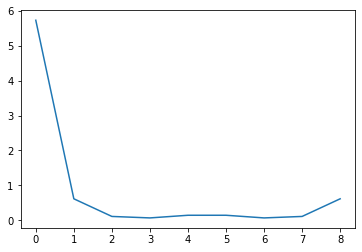

In [52]:
plt.plot(abs(fft_ts_datarray[:,0,0]))

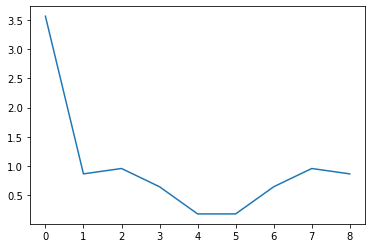

In [55]:
plt.plot(abs(fft_ts_datarray[:,1000,1000]))

In [39]:
fft_ts_datarray

array([[[ 5.72979182e+00+0.j        ,  5.53396589e+00+0.j        ,
          5.38889673e+00+0.j        , ...,  3.49225093e+00+0.j        ,
          3.43571121e+00+0.j        ,  3.41448290e+00+0.j        ],
        [ 5.57775426e+00+0.j        ,  5.56276923e+00+0.j        ,
          5.41545570e+00+0.j        , ...,  3.48314635e+00+0.j        ,
          3.35796524e+00+0.j        ,  3.36564318e+00+0.j        ],
        [ 5.72777718e+00+0.j        ,  5.65509033e+00+0.j        ,
          5.40458375e+00+0.j        , ...,  3.18401712e+00+0.j        ,
          3.17387637e+00+0.j        ,  3.32945677e+00+0.j        ],
        ...,
        [ 5.59178859e+00+0.j        ,  6.25526100e+00+0.j        ,
          6.37598753e+00+0.j        , ...,             nan+0.j        ,
                     nan+0.j        ,             nan+0.j        ],
        [ 6.06175095e+00+0.j        ,  6.32435131e+00+0.j        ,
          6.34543890e+00+0.j        , ...,             nan+0.j        ,
                    

In [66]:
fft_ts_datarray.shape

(9, 5002, 5002)

In [63]:
fft_ts_datarray_abs = da.absolute(fft_ts_datarray)

In [64]:
fft_ts_datarray_abs

array([[[5.72979182, 5.53396589, 5.38889673, ..., 3.49225093,
         3.43571121, 3.4144829 ],
        [5.57775426, 5.56276923, 5.4154557 , ..., 3.48314635,
         3.35796524, 3.36564318],
        [5.72777718, 5.65509033, 5.40458375, ..., 3.18401712,
         3.17387637, 3.32945677],
        ...,
        [5.59178859, 6.255261  , 6.37598753, ...,        nan,
                nan,        nan],
        [6.06175095, 6.32435131, 6.3454389 , ...,        nan,
                nan,        nan],
        [6.14097309, 6.31049663, 6.33320928, ...,        nan,
                nan,        nan]],

       [[0.61289336, 0.71131693, 0.58212085, ..., 0.23937499,
         0.26425114, 0.27167644],
        [0.65668221, 0.53361291, 0.49665178, ..., 0.29268402,
         0.29036182, 0.3443859 ],
        [0.62268532, 0.48330461, 0.4786111 , ..., 0.37799594,
         0.31146701, 0.42493717],
        ...,
        [0.11844492, 0.05749088, 0.04671297, ...,        nan,
                nan,        nan],
        [0.0

In [65]:
fft_ts_datarray_abs.shape

(9, 5002, 5002)

In [447]:
fft_ts_datarray_max_freq = np.max(fft_ts_datarray_abs,axis=0)

In [448]:
fft_ts_datarray_max_freq

array([[5.72979182, 5.53396589, 5.38889673, ..., 3.49225093, 3.43571121,
        3.4144829 ],
       [5.57775426, 5.56276923, 5.4154557 , ..., 3.48314635, 3.35796524,
        3.36564318],
       [5.72777718, 5.65509033, 5.40458375, ..., 3.18401712, 3.17387637,
        3.32945677],
       ...,
       [5.59178859, 6.255261  , 6.37598753, ...,        nan,        nan,
               nan],
       [6.06175095, 6.32435131, 6.3454389 , ...,        nan,        nan,
               nan],
       [6.14097309, 6.31049663, 6.33320928, ...,        nan,        nan,
               nan]])

In [449]:
fft_ts_datarray_max_freq = fft_ts_datarray_max_freq*10000

In [450]:
fft_ts_datarray_max_freq

array([[57297.91820049, 55339.65885639, 53888.96733522, ...,
        34922.50926793, 34357.11205006, 34144.8289901 ],
       [55777.54259109, 55627.6923418 , 54154.55698967, ...,
        34831.46347106, 33579.65239324, 33656.43177647],
       [57277.77183056, 56550.90332031, 54045.83752155, ...,
        31840.1711667 , 31738.76369372, 33294.56765205],
       ...,
       [55917.88589954, 62552.61003971, 63759.87529755, ...,
                   nan,            nan,            nan],
       [60617.50948429, 63243.5131073 , 63454.3889761 , ...,
                   nan,            nan,            nan],
       [61409.73091125, 63104.96628284, 63332.09276199, ...,
                   nan,            nan,            nan]])

In [451]:
fft_ts_datarray_max_freq[np.where(np.isnan(fft_ts_datarray_max_freq))] = 0

In [452]:
fft_ts_datarray_max_freq[3707,5001]

0.0

In [453]:
type(fft_ts_datarray_max_freq[3707,5001])

numpy.float64

In [454]:
np.isnan(fft_ts_datarray_max_freq[3707,5001])

False

In [455]:
fft_ts_datarray_max_freq.shape

(5002, 5002)

In [456]:
from numpy import newaxis

In [457]:
fft_ts_datarray_max_freq[:,:].real[:,:,newaxis].shape

(5002, 5002, 1)

see: https://github.com/CONABIO/antares3/blob/rapideye-support/madmex/segmentation/__init__.py#L36 **for dimension order**

In [606]:
#si es landsat:
#fft_ts_xr = xr.DataArray(fft_ts_datarray[0,:,:].real[:,:,newaxis], dims=['x', 'y','time'],
#                         coords= {'y': sr_0.coords['y'],
#                                  'x': sr_0.coords['x']})

#si es sentinel2:
fft_ts_xr = xr.DataArray(fft_ts_datarray_max_freq[:,:].real[:,:,newaxis], dims = ['x','y','time'],
                         coords= {'y': sr_0.coords['y'],
                                  'x': sr_0.coords['x']})

In [607]:
fft_ts_xr.name = 'fft_numpy'

In [608]:
fft_ts_xr

<xarray.DataArray 'fft_numpy' (x: 5002, y: 5002, time: 1)>
array([[[57297.91820049],
        [55339.65885639],
        [53888.96733522],
        ...,
        [34922.50926793],
        [34357.11205006],
        [34144.8289901 ]],

       [[55777.54259109],
        [55627.6923418 ],
        [54154.55698967],
        ...,
        [34831.46347106],
        [33579.65239324],
        [33656.43177647]],

       [[57277.77183056],
        [56550.90332031],
        [54045.83752155],
        ...,
        [31840.1711667 ],
        [31738.76369372],
        [33294.56765205]],

       ...,

       [[55917.88589954],
        [62552.61003971],
        [63759.87529755],
        ...,
        [    0.        ],
        [    0.        ],
        [    0.        ]],

       [[60617.50948429],
        [63243.5131073 ],
        [63454.3889761 ],
        ...,
        [    0.        ],
        [    0.        ],
        [    0.        ]],

       [[61409.73091125],
        [63104.96628284],
        [63332.092761

In [609]:
fft_ts_xr.attrs['nodata']=0

In [610]:
fft_ts_xr = fft_ts_xr.to_dataset()

In [611]:
fft_ts_xr

<xarray.Dataset>
Dimensions:    (time: 1, x: 5002, y: 5002)
Coordinates:
  * y          (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x          (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Dimensions without coordinates: time
Data variables:
    fft_numpy  (x, y, time) float64 5.73e+04 5.534e+04 5.389e+04 ... 0.0 0.0 0.0

In [612]:
fft_ts_xr.attrs['nodata'] = 0

In [616]:
def to_int_32(x):
    x_int = x.where(xr.DataArray.notnull(x), x.attrs['nodata'])
    return x_int.astype('int32')

In [617]:
fft_ts_xr = fft_ts_xr.apply(to_int_32)

In [618]:
fft_ts_xr

<xarray.Dataset>
Dimensions:    (time: 1, x: 5002, y: 5002)
Coordinates:
  * y          (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x          (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Dimensions without coordinates: time
Data variables:
    fft_numpy  (x, y, time) int32 57297 55339 53888 51546 52494 ... 0 0 0 0 0

In [619]:
from affine import Affine
from datacube.utils.geometry import CRS

See https://rasterio.readthedocs.io/en/stable/topics/migrating-to-v1.html **for relation between affine and geotransform**

In [620]:
l_geotransform = list(sr_0_no_chunks.crs.attrs['GeoTransform'])

In [621]:
l_affine = [l_geotransform[1], l_geotransform[2], l_geotransform[0],l_geotransform[4],l_geotransform[5],l_geotransform[3]]

In [622]:
l_affine

[10.0, 0.0, 2927940.0, 0.0, -10.0, 976140.0]

In [623]:
fft_ts_xr.attrs['affine'] = Affine(*l_affine)

In [624]:
fft_ts_xr.attrs['nodata'] = 0

In [625]:
fft_ts_xr.affine

Affine(10.0, 0.0, 2927940.0,
       0.0, -10.0, 976140.0)

In [626]:
fft_ts_xr.attrs['crs'] = CRS(sr_0_no_chunks.crs.attrs['crs_wkt'])

In [627]:
fft_ts_xr

<xarray.Dataset>
Dimensions:    (time: 1, x: 5002, y: 5002)
Coordinates:
  * y          (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x          (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Dimensions without coordinates: time
Data variables:
    fft_numpy  (x, y, time) int32 57297 55339 53888 51546 52494 ... 0 0 0 0 0
Attributes:
    affine:   | 10.00, 0.00, 2927940.00|\n| 0.00,-10.00, 976140.00|\n| 0.00, ...
    nodata:   0
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

# Run Segmentation

In [628]:
from django.contrib.gis.geos.geometry import GEOSGeometry
import gc
from importlib import import_module
import os

from madmex.settings import TEMP_DIR
from madmex.util import parser_extra_args


In [640]:
algorithm = 'bis' #'slic'
name = 'fft_test_27_11_2019_sentinel2'
extra_args = parser_extra_args(['t=40','s=0.5','c=0.7']) #for slic: parser_extra_args(['n_segments=10000', 'compactness=0.5'])

In [630]:
band_list = ['fft_numpy']

In [631]:
try:
    module = import_module('madmex.segmentation.%s' % algorithm)
    Segmentation = module.Segmentation
except ImportError as e:
    raise ValueError('Invalid model argument')

In [632]:
path = os.path.join(TEMP_DIR) + '/segmentation_results/'

In [633]:
path

'/shared_volume/temp/segmentation_results/'

In [634]:
if not os.path.exists(path):
    os.makedirs(path)

In [635]:
seg = Segmentation.from_geoarray(fft_ts_xr, **extra_args)

In [636]:
seg.geobox.extent.wkt

'POLYGON ((2927940 976140,2927940 926120,2977960 926120,2977960 976140,2927940 976140))'

In [637]:
seg.segment()


In [638]:
seg.segments_array

array([[3052942, 3052942, 3054428, ..., 3052467, 3052467, 3052467],
       [3052942, 3052942, 3054428, ..., 3052467, 3052467, 3052467],
       [3052942, 3052942, 3054428, ..., 3054427, 3054427, 3052467],
       ...,
       [   2432,       0,       0, ...,    1802,    1802,    1802],
       [      0,       0,       0, ...,    1802,    1802,    1802],
       [      0,       0,       0, ...,    1802,    1802,    1802]],
      dtype=int32)

In [639]:
fc = seg.polygonize()

In [641]:
name_file = name + '_max_values.shp'

In [642]:
name_file

'fft_test_27_11_2019_sentinel2_max_values.shp'

In [643]:
shp_path = seg.to_shapefile(filename=path + '/' +name_file, fc=fc)


In [ ]:
shp_path